## Import Libraries

In [7]:
import pandas as pd
import numpy as np

from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Load Cleaned Data

In [3]:
# Load data
df = pd.read_csv("../data/bank_cleaned.csv")
data = df.copy()

data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Select Features

In [4]:
# Drop target column if exists
X = data.drop(columns=['deposit'], errors='ignore')

# Standardize features (important for Mahalanobis distance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Fit Elliptic Envelope

In [5]:
# Initialize the model
ee = EllipticEnvelope(contamination=0.05, random_state=42)

# Fit the model and get predictions
outliers = ee.fit_predict(X_scaled)

# Map predictions to boolean: -1 = outlier, 1 = inlier
data['Outlier'] = outliers == -1
data.head()

/Users/ravdeepaulakh/Documents/CMPT459/bank-marketing-analysis/.venv/lib/python3.13/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-524.797605869781364 > -714.801020568647459). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
/Users/ravdeepaulakh/Documents/CMPT459/bank-marketing-analysis/.venv/lib/python3.13/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-529.529264023034443 > -814.656311599200194). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
/Users/ravdeepaulakh/Documents/CMPT459/bank-marketing-analysis/.venv/lib/python3.13/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > lo

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Outlier
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,False


## Summary of Outliers

In [6]:
num_outliers = data['Outlier'].sum()
print(f"Number of detected outliers: {num_outliers}")
print(f"Percentage of dataset: {num_outliers / len(data) * 100:.2f}%")

Number of detected outliers: 559
Percentage of dataset: 5.01%


## Visualize Outliers (PCA to 2D)

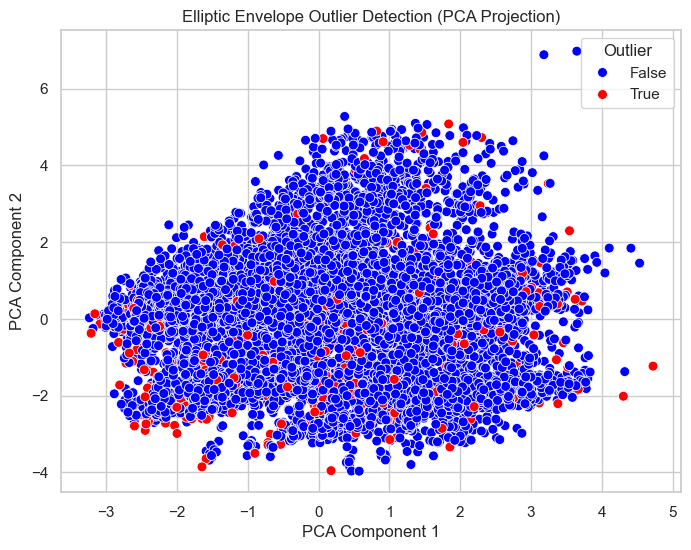

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Outlier'],
                palette={True: 'red', False: 'blue'}, s=50)
plt.title("Elliptic Envelope Outlier Detection (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Outlier")
plt.show()

## Analyze the Outliers

In [9]:
# Review the feature values of detected outliers
outlier_summary = data[data['Outlier']].describe()
outlier_summary

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,-0.043797,0.005367,-0.006177,0.601073,0.112701,-0.183736,-0.071118,-0.142752,2.181666,2.022832,0.615385
std,0.975247,0.073127,0.881897,0.490116,0.316510,0.921133,0.834889,0.564404,2.847667,2.881284,0.486940
min,-1.698332,0.000000,-0.654066,0.000000,0.000000,-1.740784,-1.060156,-0.554168,-2.993543,0.073059,0.000000
25%,-0.774958,0.000000,-0.423388,0.000000,0.000000,-0.909466,-0.632341,-0.554168,0.027217,0.073059,0.000000
50%,-0.187357,0.000000,-0.269292,1.000000,0.000000,-0.315668,-0.302477,-0.186785,2.807597,0.945695,1.000000
75%,0.484188,0.000000,0.057813,1.000000,0.000000,0.278131,0.262180,0.180598,3.304380,3.127287,1.000000
max,4.345569,1.000000,10.139143,1.000000,1.000000,1.822008,4.448139,2.384895,10.675995,24.943204,1.000000
